# IGRINS Slit Viewing Camera and TESS *Re-Oriented!*

The header info in the IGRINS Slit Viewing Camera was malformed.  Let's attempt to fix it so we can preserve our nice figures.

In [1]:
import lightkurve as lk

In [2]:
lk.__version__

'2.0.10'

In [3]:
# %load /Users/obsidian/Desktop/defaults.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import sys
import os

In [5]:
import aplpy

In [6]:
aplpy.__version__

'2.0.3'

In [7]:
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import (PercentileInterval, SqrtStretch,
                                   ImageNormalize)
from astropy.io import fits
from astropy.wcs import WCS
import montage_wrapper as montage

In [8]:
from reproject import reproject_interp, reproject_exact

In [9]:
pos = SkyCoord(ra='10 49 11.95', dec='-53 19 01.8', unit=(u.hourangle, u.deg), frame='icrs')

### What imaging do we want?

| source | band | filename |
| -- | -- | -- |
| IGRINS Slit Viewing Camera (nights 1,2,3, & 4?) | K | `data/...`|
| HST? | H | `data/...`|
| TESS | R | `data/...`|

In [10]:
rad_value = 60
rad = rad_value*u.arcsecond
diam = rad_value*2

In [11]:
def make_postage_stamp(im_in, output, hdu=None, vmin=None, vmax=None, radius=None):
    '''Make a postage stamp image'''
    fig = plt.figure(figsize=(5,5))
    if radius is None:
        radius = 60 * u.arcsecond
    if hdu is None:
        mosaic = aplpy.FITSFigure(im_in, north=True, figure = fig)
    else:
        mosaic = aplpy.FITSFigure(im_in,hdu=hdu, north=True, figure = fig)
    mosaic.recenter(pos.ra,pos.dec, radius=radius.to(u.degree).value)  # degrees
    if (vmin is not None) & (vmax is not None):
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear',
                              vmin=vmin, vmax=vmax)
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear',
                              vmin=vmin, vmax=vmax)        
    else:
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear')
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear')
    mosaic.tick_labels.set_font(size='small')
    #mosaic.tick_labels.set_xformat("hh:mm:ss")
    mosaic.set_theme('publication')

    aplpy.AxisLabels(mosaic).hide()
    aplpy.TickLabels(mosaic).hide()

    mosaic.add_scalebar(10.0 * u.arcsecond)
    #fig.scalebar.show(1.0/3600.0*4.0)  # length in degrees
    #mosaic.scalebar.set_length(4.0 * u.arcsecond)
    mosaic.scalebar.set_label("$10^{\prime\prime}$")
    #mosaic.scalebar.set_corner('bottom right')
    mosaic.scalebar.set_color('red')
    mosaic.scalebar.set_linestyle('solid')
    mosaic.scalebar.set_linewidth(5)  # points
    mosaic.scalebar.set_font(size=12, weight='medium', \
                          stretch='normal', family='sans-serif', \
                          style='normal', variant='normal')

    mosaic.save(output, dpi=300)

### 2MASS $J$ 

In [12]:
im_in = '../../data/imaging/2MASS/aK_asky_990517s0370033.fits'
output = 'Luhman16_{}x{}arcsec_2M_K.png'.format(diam, diam)

INFO: Auto-setting vmin to  5.719e+02 [aplpy.core]
INFO: Auto-setting vmax to  6.501e+02 [aplpy.core]
INFO: Auto-setting vmin to  5.717e+02 [aplpy.core]
INFO: Auto-setting vmax to  6.502e+02 [aplpy.core]
CPU times: user 1.29 s, sys: 31.8 ms, total: 1.32 s
Wall time: 1.34 s


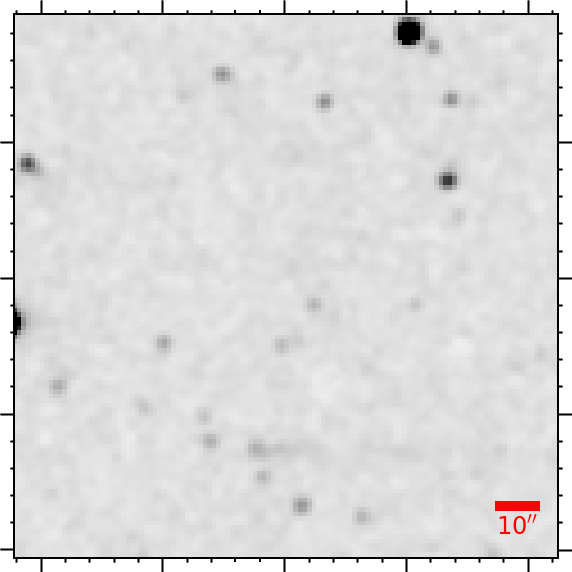

In [13]:
%%time
make_postage_stamp(im_in, output, radius=rad)

### TESS FFI

In [14]:
sr = lk.search_targetpixelfile('Luhman 16')

In [15]:
tpf = sr[0].download()

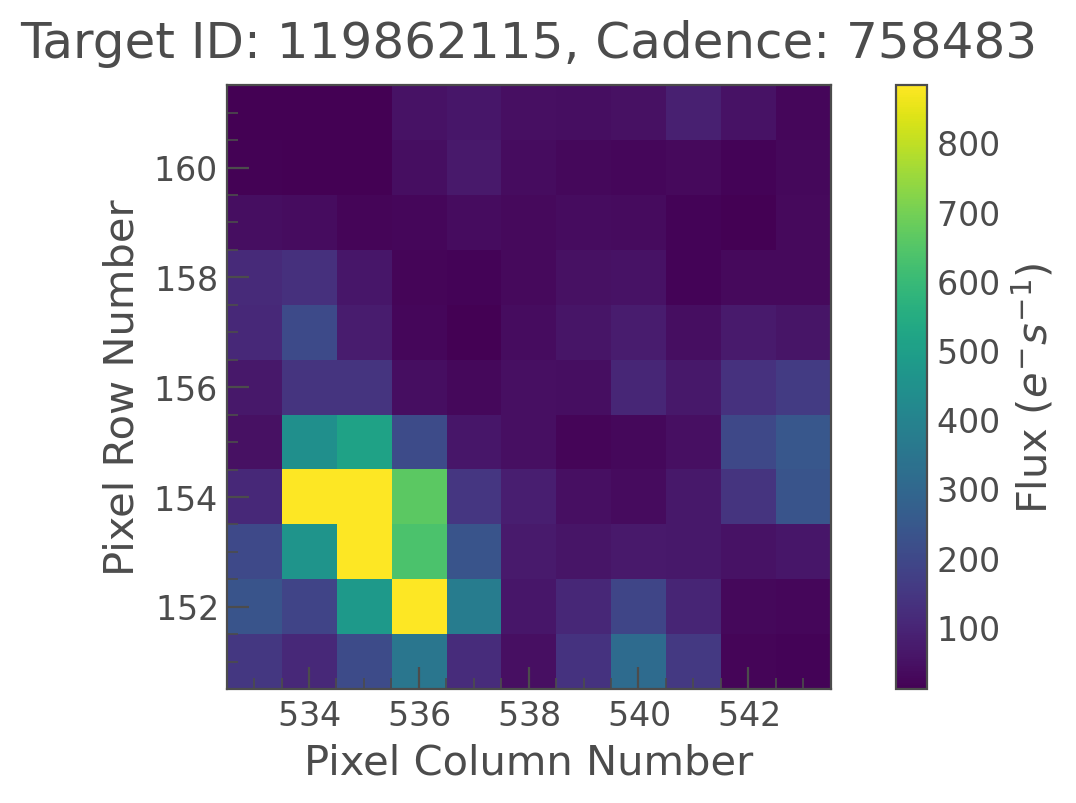

In [16]:
ax = tpf.plot()

In [17]:
tpf.ccd, tpf.camera

(1, 3)

In [18]:
im_in = '../../data/imaging/TESS/tess2021089092906-s0036-3-1-0207-s_ffic.fits'
im_in = fits.open(im_in)
output = 'Luhman16_{}x{}arcsec_TESS_S36.png'.format(diam, diam)

CPU times: user 11.6 s, sys: 1.1 s, total: 12.7 s
Wall time: 12.7 s


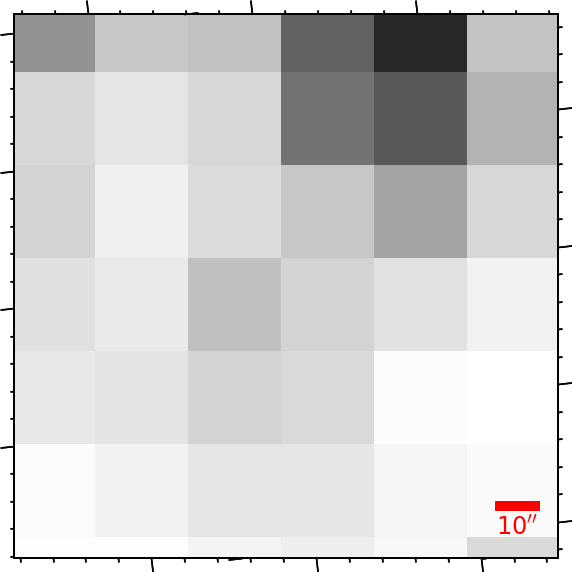

In [19]:
%%time
make_postage_stamp(im_in, output, hdu=1, vmin=150, vmax=400, radius=rad)

## HST

In [56]:
fn = '../../data/HST/MAST/MAST_2021-06-29T1207/HST/hst_15884_01_wfc3_uvis_f814w_ie1m01/hst_15884_01_wfc3_uvis_f814w_ie1m01_drc.fits'
hdu = fits.open(fn)
im_in = hdu
output = 'Luhman16_60x60arcsec_HST.png'

In [57]:
hdu.info()

Filename: ../../data/HST/MAST/MAST_2021-06-29T1207/HST/hst_15884_01_wfc3_uvis_f814w_ie1m01/hst_15884_01_wfc3_uvis_f814w_ie1m01_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     869   ()      
  1  SCI           1 ImageHDU       103   (5164, 4943)   float32   
  2  WHT           1 ImageHDU        45   (5164, 4943)   float32   
  3  CTX           1 ImageHDU        40   (5164, 4943)   int32   
  4  HDRTAB        1 BinTableHDU    564   4R x 277C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 5A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 18A, 4A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 46A, 3A, K, 5A, 3A, D, 10A, 8A, 8A, 23A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 2

In [58]:
rad_value = 10.5
rad = rad_value*u.arcsecond
diam = rad_value*2

CPU times: user 18.5 s, sys: 1.98 s, total: 20.4 s
Wall time: 20.4 s


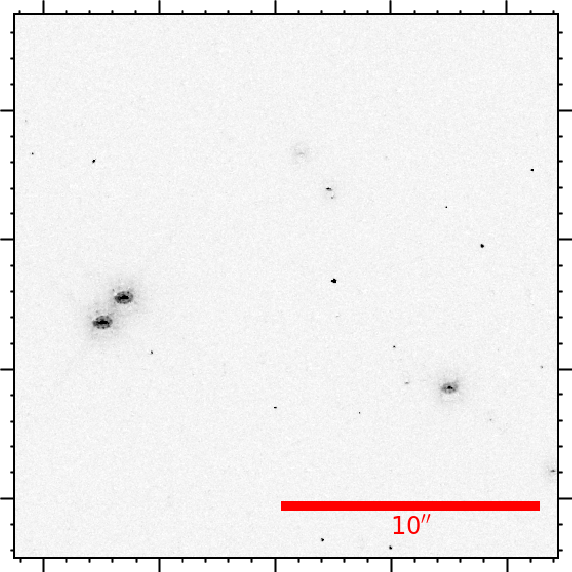

In [60]:
%%time
make_postage_stamp(im_in, output, hdu=1, vmin=-0.1, vmax=3, radius=rad)

The FITS header is malformed.

### IGRINS Slit Viewing Camera

In [43]:
rad_value = 21
rad = rad_value*u.arcsecond
diam = rad_value*2

In [44]:
fn = '../../data/IGRINS/originals/GS-2021A-DD-104/20210311/SDCS_20210311_0002.fits'
hdu = fits.open(fn)

In [45]:
im_in = hdu
output = 'Luhman16_{}x{}arcsec_IGRINS_20210311.png'.format(diam, diam)

In [46]:
hdu[1].header['CROTA1'] += 90
hdu[1].header['CROTA2'] += 90

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


CPU times: user 4.95 s, sys: 324 ms, total: 5.28 s
Wall time: 5.28 s


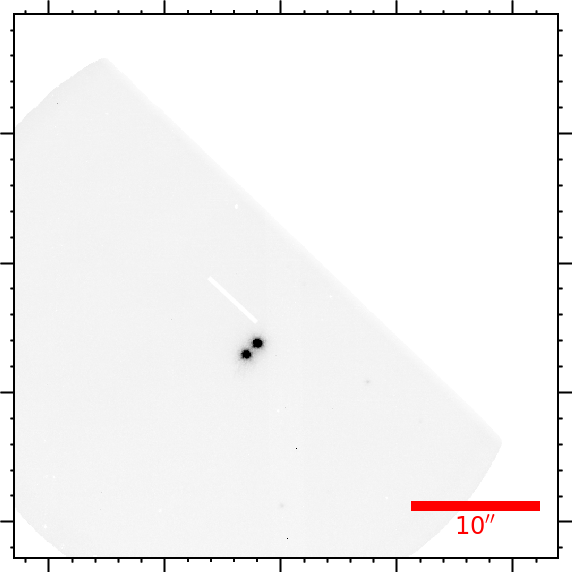

In [47]:
%%time
make_postage_stamp(im_in, output, hdu=1, vmin=0, vmax=4000, radius=rad)

### Zoom in ...

In [48]:
rad_value = 10.5
rad = rad_value*u.arcsecond
diam = rad_value*2

In [49]:
im_in = hdu
output = 'Luhman16_{}x{}arcsec_IGRINS_20210311.png'.format(diam, diam)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


CPU times: user 4.93 s, sys: 404 ms, total: 5.33 s
Wall time: 5.33 s


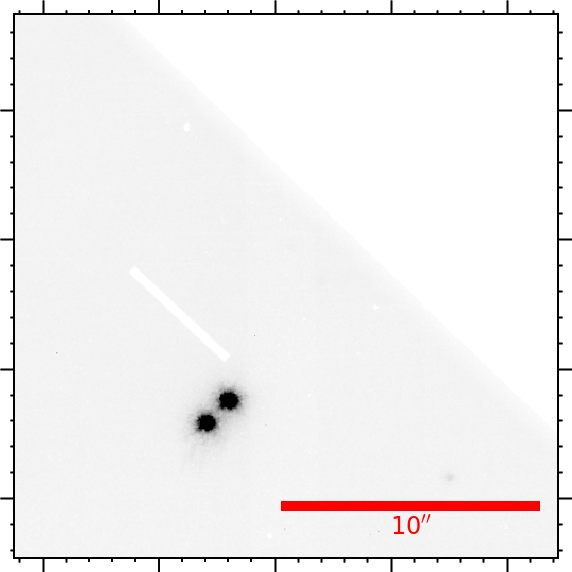

In [50]:
%%time
make_postage_stamp(im_in, output, hdu=1, vmin=0, vmax=4000, radius=rad)

## Add axis labels to make a stand-alone graphic 

In [51]:
def make_postage_stamp_with_labels(im_in, output, hdu=None, vmin=None, vmax=None, radius=None):
    '''Make a postage stamp image'''
    fig = plt.figure(figsize=(5,5))
    if radius is None:
        radius = 60 * u.arcsecond
    if hdu is None:
        mosaic = aplpy.FITSFigure(im_in, north=True, figure = fig)
    else:
        mosaic = aplpy.FITSFigure(im_in,hdu=hdu, north=True, figure = fig)
    mosaic.recenter(pos.ra,pos.dec, radius=radius.to(u.degree).value)  # degrees
    if (vmin is not None) & (vmax is not None):
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear',
                              vmin=vmin, vmax=vmax)
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear',
                              vmin=vmin, vmax=vmax)        
    else:
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear')
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear')
    mosaic.tick_labels.set_font(size=12)
    mosaic.tick_labels.set_xformat("hh:mm:ss")
    mosaic.set_theme('talk')

    #aplpy.AxisLabels(mosaic).hide()
    #aplpy.TickLabels(mosaic).hide()

    mosaic.add_scalebar(10.0 * u.arcsecond)
    #fig.scalebar.show(1.0/3600.0*4.0)  # length in degrees
    #mosaic.scalebar.set_length(4.0 * u.arcsecond)
    mosaic.scalebar.set_label("$10^{\prime\prime}$")
    #mosaic.scalebar.set_corner('bottom right')
    mosaic.scalebar.set_color('#d35400')
    mosaic.scalebar.set_linestyle('solid')
    mosaic.scalebar.set_linewidth(5)  # points
    mosaic.scalebar.set_font(size=12, weight='medium', \
                          stretch='normal', family='sans-serif', \
                          style='normal', variant='normal')

    mosaic.save(output, dpi=300)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


CPU times: user 4.87 s, sys: 428 ms, total: 5.29 s
Wall time: 5.31 s


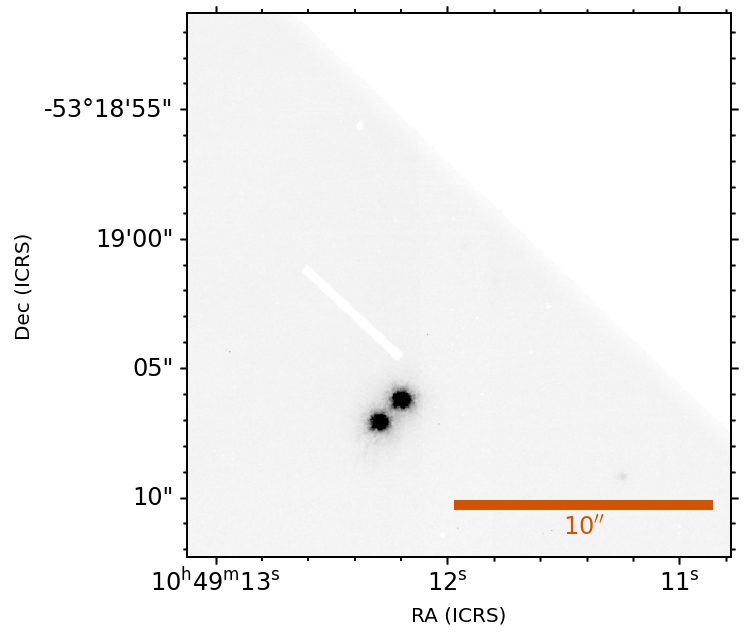

In [53]:
%%time
make_postage_stamp_with_labels(im_in, "Luhman16_IGRINS_slit_20210311.pdf", hdu=1, vmin=0, vmax=4000, radius=rad)